In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from scipy.stats import randint, uniform



## IMPORT & EXPLORE

In [2]:
krisha_almaty_rental_ext = pd.read_csv(r"C:\Users\User\Downloads\krisha_almaty_rental_ext.csv.gz")

In [3]:
krisha_almaty_rental_ext.sample(10)

,floor,total_floors,area_sqm,rooms,price,full_address_code,furniture_code,parking_code,security_code,bathroom_code,...,566,567,568,569,570,571,572,573,574,575
7960,1.0,2.0,20.0,1,150000,0,18.0,1,32.0,1,...,-0.223016,-0.208242,-0.141389,-0.001826,0.410102,-0.044789,-0.229712,-0.164721,-0.045029,0.0
5838,6.0,9.0,50.0,2,360000,6,18.0,1,32.0,2,...,-0.228217,-0.212114,-0.126551,-0.002494,0.352217,-0.049373,-0.230671,-0.157562,-0.045869,0.0
911,8.0,9.0,47.0,1,190000,1,18.0,1,32.0,5,...,-0.225472,-0.209813,-0.135012,-0.001265,0.399202,-0.054367,-0.231131,-0.156455,-0.053382,0.0
1614,9.0,22.0,107.0,3,550000,4,34.0,1,32.0,1,...,-0.223887,-0.206619,-0.132886,-0.001716,0.396828,-0.048810,-0.228640,-0.145840,-0.046700,0.0
1946,2.0,13.0,40.0,1,330000,2,18.0,1,5.0,5,...,-0.226791,-0.214777,-0.145342,-0.002437,0.377823,-0.047544,-0.231725,-0.153513,-0.048841,0.0
1806,1.0,5.0,44.0,2,200000,5,26.0,1,32.0,2,...,-0.221294,-0.211826,-0.134552,-0.000608,0.418049,-0.047832,-0.231619,-0.148991,-0.045431,0.0
3989,11.0,12.0,38.7,1,180000,1,46.0,1,32.0,5,...,-0.226447,-0.212404,-0.134793,-0.001820,0.391940,-0.048747,-0.233533,-0.155336,-0.047397,0.0
9472,9.0,18.0,92.0,3,600000,4,34.0,1,32.0,1,...,-0.223466,-0.211089,-0.139326,-0.003459,0.370095,-0.047899,-0.222532,-0.156201,-0.046470,0.0
9232,4.0,25.0,75.0,2,350000,4,34.0,1,32.0,1,...,-0.237005,-0.226538,-0.132034,-0.000918,0.408258,-0.052158,-0.251836,-0.145631,-0.050855,0.0
4180,2.0,5.0,45.0,2,250000,4,14.0,1,32.0,5,...,-0.228458,-0.212944,-0.139092,-0.002742,0.374481,-0.050953,-0.231555,-0.155444,-0.045891,0.0


In [5]:
krisha_almaty_rental_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9787 entries, 0 to 9786
Columns: 590 entries, floor to 575
dtypes: float64(581), int64(6), object(3)
memory usage: 44.1+ MB


## CLEAN & PREPARE

In [3]:
krisha_almaty_rental_ext_tabular_columns = ['floor', 'total_floors', 'area_sqm', 'rooms', 'price',
                                            'full_address_code', 'furniture_code', 'parking_code', 'security_code',
                                            'bathroom_code']

These columns gonna be normalized cuz they has high range of values and for KMeans we should do that

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
krisha_almaty_rental_tabular_sscaler = StandardScaler()


krisha_almaty_rental_ext[krisha_almaty_rental_ext_tabular_columns] = krisha_almaty_rental_tabular_sscaler.fit_transform(krisha_almaty_rental_ext[krisha_almaty_rental_ext_tabular_columns])

In [6]:
krisha_almaty_rental_ext

,floor,total_floors,area_sqm,rooms,price,full_address_code,furniture_code,parking_code,security_code,bathroom_code,...,566,567,568,569,570,571,572,573,574,575
0,0.671639,0.479218,-0.057028,0.055994,0.143553,0.026019,-0.916316,-0.136431,-0.104443,0.892597,...,-0.237112,-0.217148,-0.135501,-0.003676,0.392393,-0.054338,-0.243800,-0.157326,-0.054025,0.0
1,0.671639,0.479218,-0.057028,0.055994,0.143553,-0.968695,-0.916316,-0.136431,-0.104443,0.892597,...,-0.221801,-0.215968,-0.131692,-0.002029,0.361280,-0.049659,-0.226417,-0.156842,-0.044268,0.0
2,0.919839,-0.061906,-0.725078,-1.085699,-0.343401,1.518089,-0.721620,-0.136431,0.780141,0.892597,...,-0.227880,-0.211362,-0.136888,-0.001353,0.378046,-0.048582,-0.231232,-0.159737,-0.045023,0.0
3,-0.321161,-0.061906,-0.224041,0.055994,-0.217154,0.026019,0.641251,-0.136431,-0.104443,-0.790502,...,-0.225857,-0.210515,-0.135726,-0.000748,0.396494,-0.050888,-0.227210,-0.151185,-0.044465,0.0
4,-0.569362,-0.783405,-0.224041,0.055994,-0.090906,-1.963408,0.641251,-0.136431,-0.104443,-1.351535,...,-0.228181,-0.213554,-0.136763,-0.002813,0.362468,-0.049366,-0.230826,-0.152976,-0.048833,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9782,-1.065762,-0.963780,-0.725078,-1.085699,-0.343401,0.026019,0.641251,-0.136431,-0.104443,-1.351535,...,-0.223964,-0.212706,-0.131498,-0.003417,0.377278,-0.047499,-0.222235,-0.159581,-0.049759,0.0
9783,-1.065762,-0.783405,-0.200182,1.197687,-0.163048,-0.968695,0.641251,-0.136431,-0.104443,-1.351535,...,-0.227347,-0.211748,-0.140573,-0.001661,0.442117,-0.049963,-0.236644,-0.150520,-0.046756,0.0
9784,-0.321161,-0.061906,0.658740,1.197687,0.143553,0.026019,-0.721620,-0.136431,-0.104443,-0.790502,...,-0.225233,-0.209988,-0.131201,-0.000127,0.417516,-0.054035,-0.234062,-0.146903,-0.049380,0.0
9785,-0.072961,-0.783405,-0.605783,-1.085699,-0.126977,0.026019,1.809426,-0.136431,-0.104443,0.892597,...,-0.225698,-0.214399,-0.136825,-0.000457,0.375891,-0.054883,-0.232860,-0.140148,-0.057529,0.0


In [7]:
krisha_almaty_rental_ext[krisha_almaty_rental_ext_tabular_columns].columns

Index(['floor', 'total_floors', 'area_sqm', 'rooms', 'price',
       'full_address_code', 'furniture_code', 'parking_code', 'security_code',
       'bathroom_code'],
      dtype='object')

In [8]:
embedding_columns = [col for col in krisha_almaty_rental_ext.columns if col.isdigit()]

In [9]:
len(embedding_columns)

576

You can select the embedding columns by filtering for column names that are integers, and now we got only columns we need 

In [10]:
krisha_almaty_rental_cluster_columns = krisha_almaty_rental_ext[['floor', 'total_floors', 'area_sqm', 'rooms', 'price',
       'full_address_code', 'furniture_code', 'parking_code', 'security_code',
       'bathroom_code','id','url','contact_name'] + embedding_columns]

In [11]:
krisha_almaty_rental_cluster_columns

,floor,total_floors,area_sqm,rooms,price,full_address_code,furniture_code,parking_code,security_code,bathroom_code,...,566,567,568,569,570,571,572,573,574,575
0,0.671639,0.479218,-0.057028,0.055994,0.143553,0.026019,-0.916316,-0.136431,-0.104443,0.892597,...,-0.237112,-0.217148,-0.135501,-0.003676,0.392393,-0.054338,-0.243800,-0.157326,-0.054025,0.0
1,0.671639,0.479218,-0.057028,0.055994,0.143553,-0.968695,-0.916316,-0.136431,-0.104443,0.892597,...,-0.221801,-0.215968,-0.131692,-0.002029,0.361280,-0.049659,-0.226417,-0.156842,-0.044268,0.0
2,0.919839,-0.061906,-0.725078,-1.085699,-0.343401,1.518089,-0.721620,-0.136431,0.780141,0.892597,...,-0.227880,-0.211362,-0.136888,-0.001353,0.378046,-0.048582,-0.231232,-0.159737,-0.045023,0.0
3,-0.321161,-0.061906,-0.224041,0.055994,-0.217154,0.026019,0.641251,-0.136431,-0.104443,-0.790502,...,-0.225857,-0.210515,-0.135726,-0.000748,0.396494,-0.050888,-0.227210,-0.151185,-0.044465,0.0
4,-0.569362,-0.783405,-0.224041,0.055994,-0.090906,-1.963408,0.641251,-0.136431,-0.104443,-1.351535,...,-0.228181,-0.213554,-0.136763,-0.002813,0.362468,-0.049366,-0.230826,-0.152976,-0.048833,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9782,-1.065762,-0.963780,-0.725078,-1.085699,-0.343401,0.026019,0.641251,-0.136431,-0.104443,-1.351535,...,-0.223964,-0.212706,-0.131498,-0.003417,0.377278,-0.047499,-0.222235,-0.159581,-0.049759,0.0
9783,-1.065762,-0.783405,-0.200182,1.197687,-0.163048,-0.968695,0.641251,-0.136431,-0.104443,-1.351535,...,-0.227347,-0.211748,-0.140573,-0.001661,0.442117,-0.049963,-0.236644,-0.150520,-0.046756,0.0
9784,-0.321161,-0.061906,0.658740,1.197687,0.143553,0.026019,-0.721620,-0.136431,-0.104443,-0.790502,...,-0.225233,-0.209988,-0.131201,-0.000127,0.417516,-0.054035,-0.234062,-0.146903,-0.049380,0.0
9785,-0.072961,-0.783405,-0.605783,-1.085699,-0.126977,0.026019,1.809426,-0.136431,-0.104443,0.892597,...,-0.225698,-0.214399,-0.136825,-0.000457,0.375891,-0.054883,-0.232860,-0.140148,-0.057529,0.0


## MODEL BUILD

In [32]:
kmeans_results = []

for k in range( 5,100,1 ):

    krisha_almaty_rental_kmeans = KMeans( n_clusters = k )

    krisha_almaty_rental_kmeans.fit(krisha_almaty_rental_cluster_columns.drop(columns = ['id','contact_name','url']))

    kmeans_results.append( {'K' : k,
                            'Inertia' : krisha_almaty_rental_kmeans.inertia_} )

Optimal number of clusters (elbow): K = 25


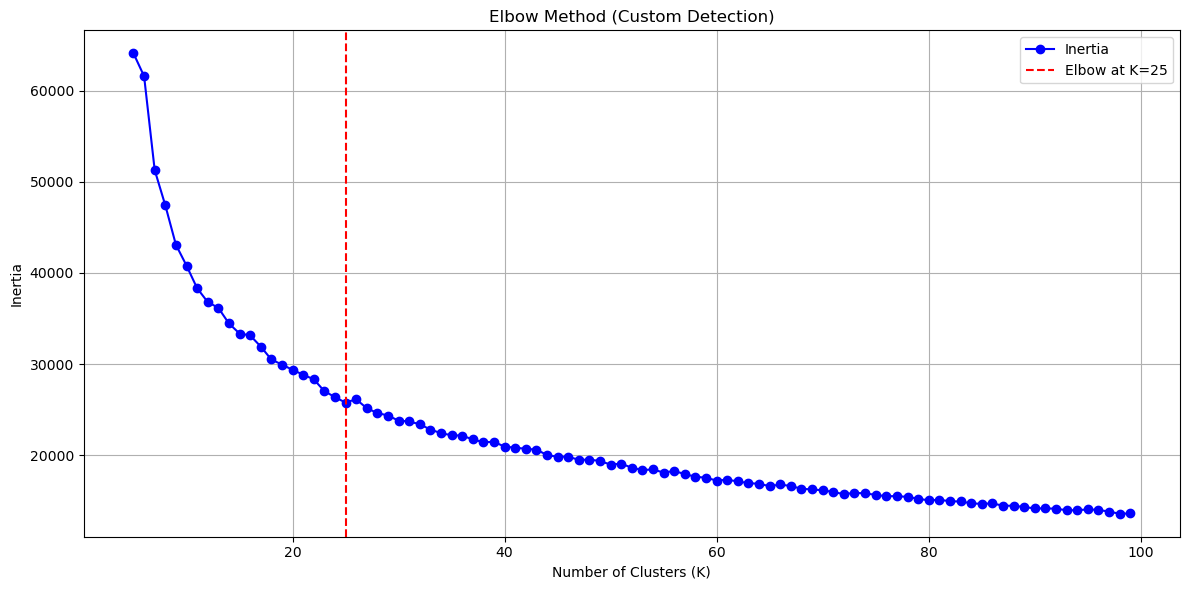

In [35]:
# Extract K values and inertia from your results
Ks = [res['K'] for res in kmeans_results]
inertias = [res['Inertia'] for res in kmeans_results]

# Custom elbow finder using max perpendicular distance to line
def find_elbow(k_values, inertia_values):
    p1 = np.array([k_values[0], inertia_values[0]])
    p2 = np.array([k_values[-1], inertia_values[-1]])
    
    distances = []
    for i in range(len(k_values)):
        p = np.array([k_values[i], inertia_values[i]])
        d = np.abs(np.cross(p2 - p1, p1 - p)) / np.linalg.norm(p2 - p1)
        distances.append(d)
        
    elbow_index = np.argmax(distances)
    return k_values[elbow_index]

# Find elbow K
elbow_k = find_elbow(Ks, inertias)
print(f"Optimal number of clusters (elbow): K = {elbow_k}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(Ks, inertias, 'bo-', label='Inertia')
plt.axvline(x=elbow_k, color='r', linestyle='--', label=f'Elbow at K={elbow_k}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method (Custom Detection)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the figure
plt.figure(figsize=(12, 6))
plt.plot(Ks, inertias, 'bo-', label='Inertia')
plt.axvline(x=elbow_k, color='r', linestyle='--', label=f'Elbow at K={elbow_k}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method (Custom Detection)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('elbow_method_kmeans.png', dpi=300)
plt.close()

#### Selection

In [36]:
from sklearn.metrics import silhouette_score

In [12]:
krisha_almaty_rental_kmeans25_tabular = KMeans( n_clusters = 25 )

krisha_almaty_rental_kmeans25_ext = KMeans( n_clusters = 25 )

In [39]:
krisha_almaty_rental_kmeans25_tabular.fit( krisha_almaty_rental_ext[krisha_almaty_rental_ext_tabular_columns] )

KMeans(n_clusters=25)

In [13]:
krisha_almaty_rental_kmeans25_ext.fit( krisha_almaty_rental_ext[['floor', 'total_floors', 'area_sqm', 'rooms', 'price',
                                                                 'full_address_code', 'furniture_code', 'parking_code', 'security_code',
                                                                 'bathroom_code'] + embedding_columns] )

KMeans(n_clusters=25)

In [47]:
# Tabular only
silhouette_tabular = silhouette_score(
    krisha_almaty_rental_ext[krisha_almaty_rental_ext_tabular_columns],
    krisha_almaty_rental_kmeans25_tabular.labels_
)

# Tabular + embeddings
silhouette_ext = silhouette_score(
    krisha_almaty_rental_ext[krisha_almaty_rental_ext_tabular_columns + embedding_columns],
    krisha_almaty_rental_kmeans25_ext.labels_
)

In [49]:
print(f'silhouette_tabular : {silhouette_tabular}')

print(f'silhouette_ext : {silhouette_ext}')



silhouette_tabular : 0.1978283159625987
silhouette_ext : 0.1958240986911296


In [51]:
krisha_almaty_rental_ext[embedding_columns]

,0,1,2,3,4,5,6,7,8,9,...,566,567,568,569,570,571,572,573,574,575
0,0.0,0.0,-0.150335,-0.037325,3.190710,-0.070799,0.000000e+00,-0.166618,-0.074360,0.0,...,-0.237112,-0.217148,-0.135501,-0.003676,0.392393,-0.054338,-0.243800,-0.157326,-0.054025,0.0
1,0.0,0.0,-0.151133,-0.031669,3.062563,-0.069455,0.000000e+00,-0.158656,-0.074971,0.0,...,-0.221801,-0.215968,-0.131692,-0.002029,0.361280,-0.049659,-0.226417,-0.156842,-0.044268,0.0
2,0.0,0.0,-0.149368,-0.032660,3.106005,-0.068045,0.000000e+00,-0.159662,-0.079368,0.0,...,-0.227880,-0.211362,-0.136888,-0.001353,0.378046,-0.048582,-0.231232,-0.159737,-0.045023,0.0
3,0.0,0.0,-0.151041,-0.034126,3.094674,-0.070027,0.000000e+00,-0.157380,-0.083051,0.0,...,-0.225857,-0.210515,-0.135726,-0.000748,0.396494,-0.050888,-0.227210,-0.151185,-0.044465,0.0
4,0.0,0.0,-0.156421,-0.030483,3.093936,-0.069007,0.000000e+00,-0.155447,-0.080286,0.0,...,-0.228181,-0.213554,-0.136763,-0.002813,0.362468,-0.049366,-0.230826,-0.152976,-0.048833,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9782,0.0,0.0,-0.159517,-0.033726,3.149400,-0.072389,0.000000e+00,-0.162436,-0.077681,0.0,...,-0.223964,-0.212706,-0.131498,-0.003417,0.377278,-0.047499,-0.222235,-0.159581,-0.049759,0.0
9783,0.0,0.0,-0.149330,-0.032833,3.147691,-0.067018,0.000000e+00,-0.161657,-0.070372,0.0,...,-0.227347,-0.211748,-0.140573,-0.001661,0.442117,-0.049963,-0.236644,-0.150520,-0.046756,0.0
9784,0.0,0.0,-0.155659,-0.034908,3.149604,-0.070560,-3.989810e-07,-0.162792,-0.083832,0.0,...,-0.225233,-0.209988,-0.131201,-0.000127,0.417516,-0.054035,-0.234062,-0.146903,-0.049380,0.0
9785,0.0,0.0,-0.155477,-0.036529,3.129240,-0.070693,-7.033691e-04,-0.159435,-0.091122,0.0,...,-0.225698,-0.214399,-0.136825,-0.000457,0.375891,-0.054883,-0.232860,-0.140148,-0.057529,0.0


#### MODEL SAVE

In [15]:
from joblib import dump

dump(krisha_almaty_rental_kmeans25_ext,"krisha_almaty_rental_kmeans25_ext.joblib")

['krisha_almaty_rental_kmeans25_ext.joblib']

In [16]:
dump(krisha_almaty_rental_tabular_sscaler,"krisha_almaty_rental_tabular_sscaler.joblib")

['krisha_almaty_rental_tabular_sscaler.joblib']